In [1]:
#Bibliotecas

#Bibliotecas
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import McsPy

import pathlib

from utiles import spike_reducer
#spike_recuder
import umap
import umap.plot
from umap import UMAP

##Generar un archivo PKL
import pickle 

##Algoritmosde Clustering

import hdbscan

In [2]:
#Abrir con h5py o McsPy

path = "/home/yeshua/Documentos/repositorios/T_proyect/files/"
file_name = "CTR20211101s01A_SPK.h5"

file_h5py = h5py.File(path + file_name)
file_McsPy = McsPy.McsData.RawData(path+file_name)

In [3]:
file_h5py['Data']['Recording_0']['SegmentStream']['Stream_0']['SegmentData_0'].ref

<HDF5 object reference>

In [15]:
#Crear gráfico de referecia
dict_code = pathlib.Path('./files/electrodes.txt').read_text()#.replace('\n', ' ')
exec(dict_code) #crea un diccionario llamado electrodes_matrix
keys = list(electrodes_matrix.keys())
print(electrodes_matrix)
print(len(keys))
print(electrodes_matrix[0][0])

{0: [0.0, 0.0], 1: [0.0, -200.0], 2: [0.0, -1000.0], 3: [0.0, -800.0], 4: [0.0, -600.0], 5: [0.0, -400.0], 6: [-200.0, -1000.0], 7: [-200.0, -800.0], 8: [-200.0, -600.0], 9: [-200.0, -400.0], 10: [-400.0, -1000.0], 11: [-400.0, -800.0], 12: [-400.0, -600.0], 13: [-400.0, -400.0], 14: [-600.0, -800.0], 15: [-600.0, -600.0], 16: [-800.0, -600.0], 17: [-200.0, -200.0], 18: [-600.0, -400.0], 19: [-800.0, -400.0], 20: [-1000.0, -400.0], 21: [-400.0, -200.0], 22: [-600.0, -200.0], 23: [-800.0, -200.0], 24: [-1000.0, -200.0], 25: [-400.0, 0.0], 26: [-600.0, 0.0], 27: [-800.0, 0.0], 28: [-1000.0, 0.0], 29: [-200.0, 0.0], 30: [0.0, 200.0], 31: [-200.0, 200.0], 32: [-1000.0, 200.0], 33: [-800.0, 200.0], 34: [-600.0, 200.0], 35: [-400.0, 200.0], 36: [-1000, 400.0], 37: [-800, 400.0], 38: [-600.0, 400.0], 39: [-400.0, 400.0], 40: [-1000.0, 600.0], 41: [-800.0, 600.0], 42: [-600.0, 600.0], 43: [-400.0, 600.0], 44: [-800.0, 800.0], 45: [-600.0, 800.0], 46: [-600.0, 1000.0], 47: [-200.0, 400.0], 48: 

(-1050.0, 1250.0, -1050.0, 1250.0)

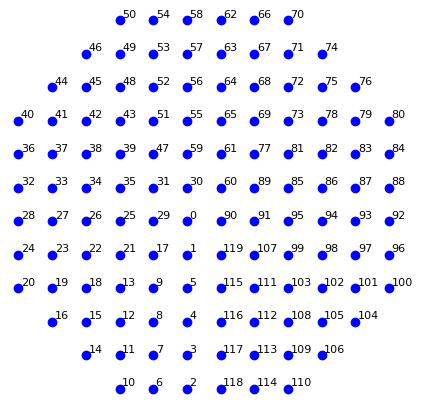

In [31]:
plt.figure(figsize = (5,5))
for i in range(0,len(keys)):
    plt.plot(electrodes_matrix[i][0],electrodes_matrix[i][1], 'bo')
    plt.annotate(str(i), xy=(electrodes_matrix[i][0]+15,electrodes_matrix[i][1]+15), fontsize = 8)
#plt.title("Electrodos activos")
plt.xlim(-1050,1250)
plt.ylim(-1050,1250)
plt.axis('off')

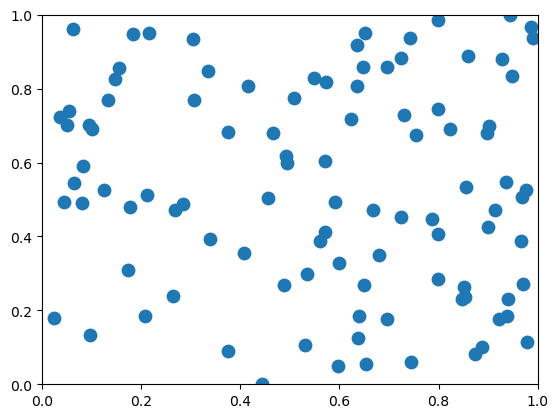

In [34]:
data = np.random.rand(100, 2)
subplot_kw = dict(xlim=(0, 1), ylim=(0, 1), autoscale_on=False)
fig, ax = plt.subplots(subplot_kw=subplot_kw)
pts = ax.scatter(data[:, 0], data[:, 1], s=80)


In [37]:
data[:,0]

array([0.12495038, 0.30376174, 0.69528158, 0.63570933, 0.33569725,
       0.09712451, 0.85373874, 0.6504489 , 0.65384839, 0.083242  ,
       0.5917309 , 0.05009835, 0.99046814, 0.09406536, 0.94406527,
       0.96743712, 0.17689424, 0.73082885, 0.97047676, 0.03679236,
       0.72506001, 0.18372328, 0.06290745, 0.26936472, 0.63917773,
       0.54845416, 0.91417383, 0.96514876, 0.65063943, 0.10121795,
       0.97903484, 0.02462528, 0.08060885, 0.90178647, 0.21185644,
       0.85028969, 0.49367105, 0.7993613 , 0.50827119, 0.56033814,
       0.49253704, 0.64685543, 0.46593104, 0.535251  , 0.66745672,
       0.44294673, 0.79865029, 0.7859216 , 0.85915849, 0.93776116,
       0.63814813, 0.88769981, 0.3384694 , 0.17404367, 0.74514112,
       0.63554495, 0.13316295, 0.75533306, 0.26371075, 0.41624178,
       0.15618052, 0.84800176, 0.97650615, 0.20709612, 0.87356582,
       0.62333677, 0.05515273, 0.21691528, 0.72488018, 0.37529999,
       0.0442556 , 0.89852845, 0.28548847, 0.74129986, 0.92869